# Atelier 6


## TRAORE Issiaka IRSI 2
## AHDDAD Imad IRSI
## TRAORE Koudadim Olivier IFA 2

## Préparation des données

In [6]:
# import pandas as pd
import numpy as np
import itertools

from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

Sports = ["Arts_martiaux","Athletisme","Autre","Sport_animaux","Sport_collectif","Sport_mecanique"]

Frequence = ["F1","F2","F3","F4","F5","F6"]

#Lecture fichier csv
dataf = pd.read_csv("C:/Users/asus/Desktop/Python/sport.csv")

#de dataframe en array
datam = dataf[dataf.columns[1:]].to_numpy()
dataf


,Unnamed: 0,1 a 3 fois par semaine,Chaque 2 semaines,Chaque mois,Jamais,Presque chaque jour,Rarement
0,Arts martiaux,2,0,0,0,1,0
1,Athletisme,3,2,0,0,1,4
2,Autre,2,1,1,1,3,4
3,Sport avec animaux,1,0,0,0,0,0
4,Sport collectif,5,7,2,0,0,10
5,Sport mecanique,1,1,0,0,0,0


## Test d'indépendance avec khi2 

In [7]:
#total du tableau
grandTotal = np.sum(datam)

#Calcul des proportion fij
correspondenceMatrix = np.divide(datam,grandTotal)

#Marge ligne et colonne
rowTotals = np.sum(correspondenceMatrix, axis=1)
columnTotals = np.sum(correspondenceMatrix, axis=0)

#Matrice d'indépendance fi.*f.j
independenceModel = np.outer(rowTotals, columnTotals)

#Calcul du khi2

chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)

## Décomposition de la matrice

In [8]:

#La matrice résiduelle
standardizedResiduals = np.divide((correspondenceMatrix-independenceModel),np.sqrt(independenceModel))

#singular value decomposition(SVD): est la fonction qui fait la decomposition
u,s,vh = np.linalg.svd(standardizedResiduals, full_matrices=False)

## Calcul des composantes (axes)

In [10]:
stdRows = np.zeros((u.shape[0],u.shape[1]))
for i in range(u.shape[0]):
    stdRows[i] = np.divide(u[i],np.sqrt(rowTotals[i]))

stdCols = np.zeros((vh.shape[0],vh.shape[1]))
for i in range(vh.shape[0]):
    stdCols[i] = np.divide(vh[i],np.sqrt(columnTotals[i]))

rowCoordinates = np.dot(stdRows,np.diag(s))
colCoordinates = np.dot(stdCols,np.diag(s))

dfFirstTwoComponentsR = pd.DataFrame(data=[l[0:2] for l in rowCoordinates], columns=['Factorial_axis_1', 'Factorial_axis_2'], index=Sports)
dfFirstTwoComponentsC = pd.DataFrame(data=[l[0:2] for l in colCoordinates], columns=['Factorial_axis_1', 'Factorial_axis_2'], index=Frequence)
dfFirstTwoComponents =  dfFirstTwoComponentsR.append(dfFirstTwoComponentsC)
 
print(dfFirstTwoComponents) 

                 Factorial_axis_1  Factorial_axis_2
Arts_martiaux           -1.028303          0.833397
Athletisme               0.024227          0.131849
Autre                   -0.630947         -0.426292
Sport_animaux           -0.340395          1.458061
Sport_collectif          0.419923         -0.070175
Sport_mecanique          0.338127          0.761480
F1                      -0.167104          0.349958
F2                       0.807511          0.025203
F3                      -0.079500         -0.766026
F4                      -1.155655          1.639022
F5                       0.218910         -0.054365
F6                      -0.432945         -0.303579


C:\Users\asus\AppData\Local\Temp\ipykernel_28040\562720558.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfFirstTwoComponents =  dfFirstTwoComponentsR.append(dfFirstTwoComponentsC)


## Affichage du nuage de points 

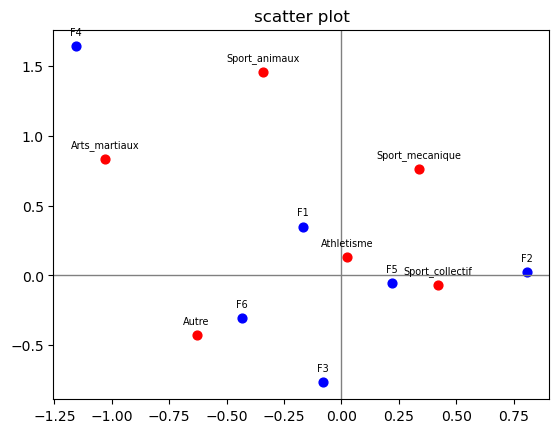

In [12]:
 
fig, ax_kwargs = plt.subplots()
plt.scatter(dfFirstTwoComponentsR['Factorial_axis_1'], dfFirstTwoComponentsR['Factorial_axis_2'], s = 40, c = 'red')
plt.scatter(dfFirstTwoComponentsC['Factorial_axis_1'], dfFirstTwoComponentsC['Factorial_axis_2'], s = 40, c = 'blue')
plt.title('scatter plot')
ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)
points=Sports+Frequence
for i, txt in enumerate(points):
    ax_kwargs.annotate(txt, (dfFirstTwoComponents['Factorial_axis_1'][i], dfFirstTwoComponents['Factorial_axis_2'][i]+0.1),horizontalalignment='center', verticalalignment='center',size=7)
plt.show()